In [2]:
import numpy as np
import sklearn as skv
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importera in datasetet
#i denna uppgift använder jag mig en kreditdataset
df = pd.read_csv('credit_data.csv')

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
#för att inte får problem med NAN-values, så droppar jag dessa värden
df.dropna(axis=0)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car
...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
998,23,male,2,free,little,little,1845,45,radio/TV


In [6]:
data = df.copy()

In [7]:
#för att inte kunna utföra analys, behöver vi transformera data från strings till integers
# i detta fall kategoriska variabler (dummy-variables), som antar värden 0,1
data = pd.get_dummies(df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']])

In [8]:
data

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
996,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
998,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


(1000, 20)
(1000, 2)


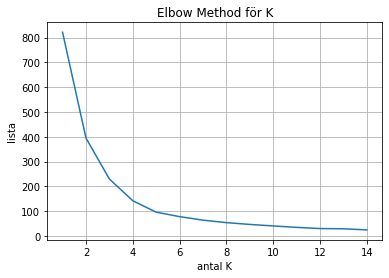

-24.48308943060248


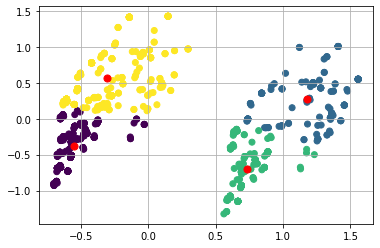

In [46]:
from sklearn.decomposition import PCA 
#för att underlätta analys så reducerar vi antalet features
#PCA gör således en tradeoff mellan komplexitet och information

pca = PCA(2)  
datafit = pca.fit_transform(data)
print(data.shape)
print(projected.shape)


#för att identifiera antalet K (centroids) använder jag mig av elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
elbl = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(datafit)
    elbl.append(km.inertia_)
plt.plot(K, elbl)
plt.xlabel('antal K')
plt.ylabel('lista')
plt.title('Elbow Method för K')
plt.grid(True)
plt.show()

#vi väljer 4 i vår modell
#först omvandlas prediktion array till dataframe
pca=pd.DataFrame(datafit)
pca.columns=['First component','Second Component']
#skapar algoritmen, 4 clusters och tränar den mot pca
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)

#vi vill också validera hur bra vår modell är, i detta fall är bra nära noll
print(km.score(datafit))

plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans)

#vi vill också plotta ut vilket som är centers (rödaprickar) på vår data
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

plt.grid(True)

In [37]:
#Så utifrån detta kan banken göra en kreditanalys baserat på 
#vilken kategori en kund tillhör
#vi kan också se att vår modell inte är särskilt accurate med tanke på scoret